In [1]:
%matplotlib inline
from lstm_siamese import dir_dictionary
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os.path
from siamese_core import load_batched_data_sentence
import editdistance
from sklearn.metrics import roc_curve, auc

result root is at /Users/yimengzh/Research/lstm-siamese/results


In [2]:
# collect all stats
def get_all_names(filename):
    sentence_names_all = []
    sentence_id_all = []
    def name_id_call_back(name, obj):
        if isinstance(obj, h5py.Dataset):
            sentence_names_all.append(name)
            id_this = int(name.split('/')[-1][2:])
            sentence_id_all.append(id_this)
    with h5py.File(stat_this, 'r') as f:
        f.visititems(name_id_call_back)
    return sentence_names_all, sentence_id_all

def compute_all_score(filename, p_list):
    score_all = []
    with h5py.File(filename, 'r') as f:
        for p1, p2 in p_list:
            fea1 = f[p1][...]
            fea2 = f[p2][...]
            dis_this = editdistance.eval(fea1, fea2)/((len(fea1) + len(fea2))/2)
            score_all.append(-dis_this)
    return np.array(score_all)

unique id count 624,positive set 120


/Users/yimengzh/miniconda2/envs/default35/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


unique id count 624,positive set 120
unique id count 624,positive set 120
unique id count 624,positive set 120


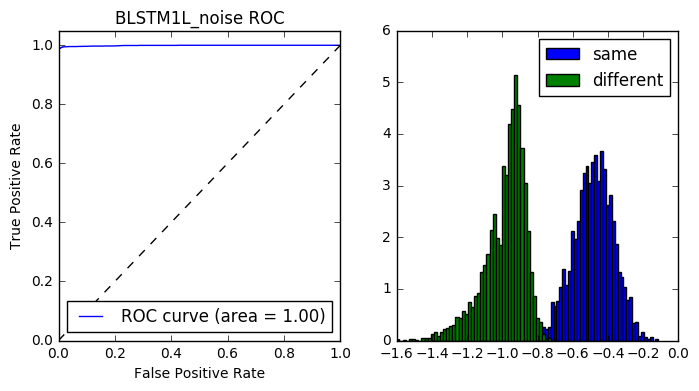

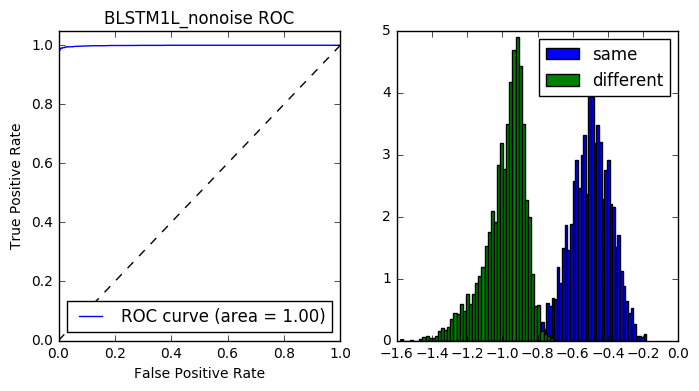

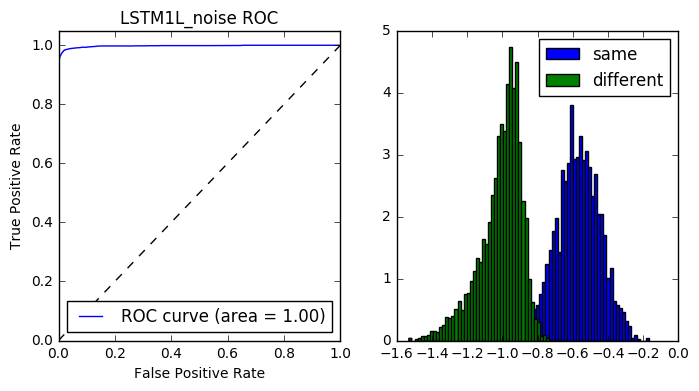

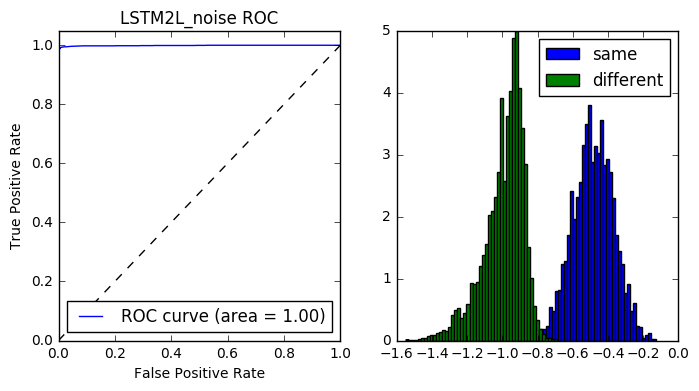

In [3]:
model_list = ['BLSTM1L_default_noise', 'BLSTM1L_default_nonoise', 'LSTM1L_default_noise', 'LSTM2L_default_noise']
title_list = ['BLSTM1L_noise', 'BLSTM1L_nonoise', 'LSTM1L_noise', 'LSTM2L_noise']
lw = 2.5
for model, title_this in zip(model_list, title_list):
    # get the location of hdf5 file
    stat_this = os.path.join(dir_dictionary['models'], 'TIMIT_train_' + model, 'predictions.hdf5')
    sentence_names_all, sentence_id_all = get_all_names(stat_this)
    pair_name_list, signal_list_all = load_batched_data_sentence(sentence_names_all, sentence_id_all)
    score_all_this = compute_all_score(stat_this, pair_name_list)
    fpr, tpr, _ = roc_curve(signal_list_all, score_all_this)
    roc_auc = auc(fpr, tpr)
    
#     online_loss, online_error, test_error, test_loss, train_error, train_loss = collect_stat_one_file(stat_this)
    
#     plt.close('all')
#     fig = plt.figure(figsize=(6,4))
#     plt.plot(online_loss[:,0], online_loss[:,1], label='online loss')
#     plt.plot(online_error[:,0], online_error[:,1]*100, label='online error')
    
#     plt.plot(test_error[:,0], test_error[:,1]*100, label='test error', linewidth=lw)
#     plt.plot(test_loss[:,0], test_loss[:,1], label='test loss', linewidth=lw)
    
#     plt.plot(train_error[:,0], train_error[:,1]*100, label='train error', linewidth=lw)
#     plt.plot(train_loss[:,0], train_loss[:,1], label='train loss', linewidth=lw)
    
#     plt.ylim(30,200)
#     plt.title(title_this + ' test loss {:.2f} / error {:.2f}'.format(test_loss[:,1].min(),
#                                                                test_error[:,1].min()*100))
#     plt.xlabel('epoch')
#     plt.ylabel('cost')
#     plt.legend()
#     fig.savefig(model+'.pdf', dpi=300)
#     plt.show()
# Plot of a ROC curve for a specific class
    fig, ax = plt.subplots(ncols=2, figsize=(8,4))
    ax[0].plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
    ax[0].plot([0, 1], [0, 1], 'k--')
    ax[0].set_xlim([0.0, 1.0])
    ax[0].set_ylim([0.0, 1.05])
    ax[0].set_xlabel('False Positive Rate')
    ax[0].set_ylabel('True Positive Rate')
    ax[0].set_title(title_this + ' ROC')
    ax[0].legend(loc="lower right")
    
    ax[1].hist(score_all_this[signal_list_all==True], bins=50, label='same', normed=True)
    ax[1].hist(score_all_this[signal_list_all==False], bins=50, label='different', normed=True)
    ax[1].legend(loc="best")
    fig.show()
    fig.savefig(model+'_roc.pdf', dpi=300)
    
    